# Do some prep work for the movie hack on Thu

- Test movie making on some very high res data to see if its feasible
- Fiddle with the colormaps

In [47]:
import intake
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

import easygems.healpix as egh

In [48]:
catfn='/home/tmerlis/hackathon/xsh24_scream_main_v2.yaml'
combo_cat = intake.open_catalog(catfn)
cat = combo_cat.xsh24_native(zoom=10)
    
dsn_raw =cat.to_dask()
dsn = dsn_raw.pipe(egh.attach_coords)

/home/jbusecke/.conda/envs/easy25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [49]:
dsn

<xarray.Dataset> Size: 4TB
Dimensions:       (time: 3560, cell: 12582912)
Coordinates:
  * time          (time) object 28kB 2019-10-20 03:00:00 ... 2021-01-07 00:00:00
    crs           int64 8B 0
  * cell          (cell) int64 101MB 0 1 2 3 ... 12582909 12582910 12582911
    lat           (cell) float64 101MB 0.0373 0.0746 0.0746 ... -0.0746 -0.0373
    lon           (cell) float64 101MB 45.0 45.04 44.96 ... 315.0 315.0 315.0
Data variables: (12/22)
    40dBz_height  (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    CAPE_max      (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    CIN_max       (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    TMP500_300    (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    clivi         (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    clwvi         (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    ...            ...
    w500          (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    w850          (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    wind100m      (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    wind10mmax    (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    wmaxdn_min    (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    wmaxup_max    (time, cell) float32 179GB dask.array<chunksize=(24, 262144), meta=np.ndarray>

In [9]:
# import xarray as xr
# import numpy as np

# x = xr.DataArray(np.arange(360), dims=['x'])
# y = xr.DataArray(np.arange(-90, 90), dims=['y'])
# data_a = xr.DataArray(np.random.rand(360, 180, 100), dims=['x', 'y', 'time'], coords={'x':x, 'y':y}) * np.sin(np.deg2rad(y)*5)
# data_b = data_a * np.cos(np.deg2rad(x))
# ds = xr.Dataset({'a':data_a, 'b':data_b})

# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# from matplotlib.animation import FuncAnimation

# levels = [0.05, 0.95]
# colors = ['orange']
# plot_kwargs = dict(transform=ccrs.PlateCarree(), x='x', y='y')

# def frame_to_lon_lat(frame, ds):
#     # simples linear scaling. You can be much fancier here and add ramps, stops, etc...
#     lon_range = np.linspace(0,360, len(ds.time))
#     lat_range = np.linspace(0,180, len(ds.time))
#     return lon_range[frame], lat_range[frame] 

# # make initial figure
# init_lon, _ = frame_to_lon_lat(0, ds)
# fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Robinson(central_longitude=init_lon)})

# # # make initial figure
# # fig, ax = plt.subplots()

# # ax = plt.gca()
# ds_frame = ds.isel(time=0)
# mesh = ds_frame.a.plot(vmax=1, **plot_kwargs)
# contour = ds_frame.b.plot.contour(colors=colors,levels=levels, add_colorbar=False, **plot_kwargs)
# pp=[mesh, contour]
# ax.coastlines()

# def update_plot_frame(frame, ds, ax):
#     # You can probably update these more efficiently by just replacing the mesh.properties()['data'] but 
#     # lets use the easiest thing for now
#     # just make some new mesh and update the old one from that
#     ds_frame = ds.isel(time=frame).squeeze()

#     # How do i remove the mesh?
#     # seems like I do not have to?
#     pp[0].remove()

#     # the contours need to be removed (otherwise they will all overplot each other)
#     pp[1].remove()

#     # # set projection to rotate
#     lon_frame, _ = frame_to_lon_lat(frame, ds)
#     ax.projection = ccrs.Robinson(central_longitude=lon_frame)
    
#     pp[0] = ds_frame.a.plot(vmax=1, add_colorbar=False, **plot_kwargs)
#     pp[1] = ds_frame.b.plot.contour(colors=colors,levels=levels, add_colorbar=False, **plot_kwargs)
#     return pp

# fa = FuncAnimation(fig, update_plot_frame, 200, fargs=[ds, ax])
# fa.save("bye_bye_xmovie.gif")

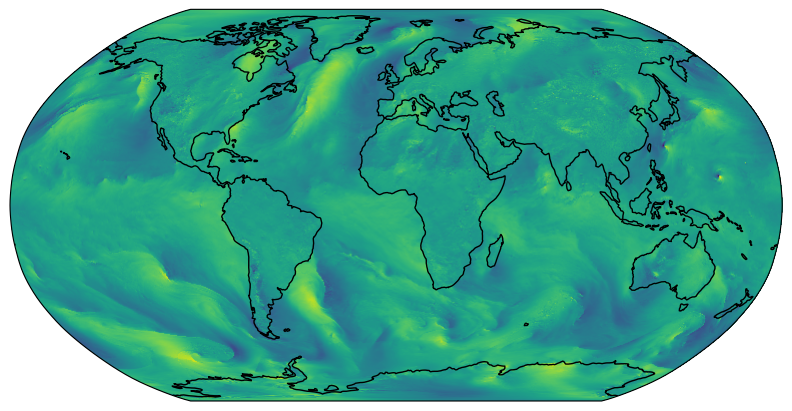

In [17]:
from matplotlib.animation import FuncAnimation

def update_plot_frame(frame, ds, ax, **plot_kwargs):
    ds_frame = ds.isel(time=frame)
    pp[0] = egh.healpix_show(ds_frame['vas'], ax=ax, **plot_kwargs)
    return pp

fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": ccrs.Robinson()}, constrained_layout=True
    )
ax.set_global()
ax.coastlines()

#initial frame
pp = ['dummy']
pp[0] = update_plot_frame(0, dsn, ax)

fa = FuncAnimation(fig, update_plot_frame, 100, fargs=[dsn, ax])
fa.save("hackathon.mp4")

## This is not parallel...lets do streamjoy!

In [2]:
# import numpy as np
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt
# from streamjoy import stream, wrap_matplotlib

# @wrap_matplotlib()
# def plot(da, central_longitude, **plot_kwargs):
#     time = da["time"].dt.strftime("%b %d %Y").values.item()
#     projection = ccrs.Orthographic(central_longitude=central_longitude)
#     subplot_kw = dict(projection=projection, facecolor="gray")
#     fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=subplot_kw)
#     im = da.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
#     ax.set_title(f"Sea Surface Temperature Anomaly\n{time}", loc="left", transform=ax.transAxes)
#     ax.set_title("Source: NOAA OISST v2.1", loc="right", size=5, y=-0.01)
#     ax.set_title("", loc="center")  # suppress default title
#     plt.colorbar(im, ax=ax, label="°C", shrink=0.8)
#     return fig

# if __name__ == "__main__":
#     url = (
#       "https://www.ncei.noaa.gov/data/sea-surface-temperature-"
#       "optimum-interpolation/v2.1/access/avhrr/201008/"
#     )
#     pattern = "oisst-avhrr-v02r01.*.nc"
#     stream(
#         url,
#         uri="oisst.gif",
#         pattern=pattern,  # GifStream.from_url kwargs
#         max_files=30,
#         renderer=plot,  # renderer related kwargs
#         renderer_iterables=[np.linspace(-140, -150, 30)],  # iterables; central longitude per frame (30 frames)
#         renderer_kwargs=dict(cmap="RdBu_r", vmin=-5, vmax=5),  # renderer kwargs
#         # cmap="RdBu_r", # renderer_kwargs can also be propagated for convenience
#         # vmin=-5,
#         # vmax=5,
#     )

In [4]:
ds = xr.tutorial.open_dataset("air_temperature").isel(time=slice(0, 100))

In [41]:
from streamjoy import stream, wrap_matplotlib
from streamjoy import stream, connect
import xarray as xr
# from streamjoy import stream, wrap_matplotlib

@wrap_matplotlib()
def plot_func_a(da_frame, da_frame_other, **plot_kwargs):
    projection = ccrs.Orthographic(central_longitude=270)
    subplot_kw = dict(projection=projection, facecolor="gray")
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=subplot_kw)
    im = da_frame.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
    # overlay another variable test
    cc = da_frame_other.plot.contour(ax=ax, colors='orange', transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
    
    ax.set_title("Testing", loc="right", size=5, y=-0.01)
    ax.set_global()
    plt.colorbar(im, ax=ax, label="°C", shrink=0.8)
    return fig

st = stream(
    ds, 
    dim='time', 
    var='air', # this natively only works with a dataarray
    renderer=plot_func_a, 
    renderer_iterables=[ds['air']] # I am passing each timestep again as a daataset!!!
) 

[WARNING] 10:54PM: The length of the iterables matches the length of the resources. This is likely not what you want; the iterables should be a list of lists, where each inner list corresponds to the arguments for each frame.
[WARNING] 10:54PM: No 'max_frames' specified; using the default 50 / 100 frames. Pass `-1` to use all frames. Suppress this by passing 'max_frames'.


In [42]:
st.write('combined.mp4')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36589,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: 28 minutes ago,Total memory: 0 B
Comm: tcp://127.0.0.1:41459,Total threads: 4
Dashboard: http://127.0.0.1:41229/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:38135,


/tmp/ipykernel_627340/1050402892.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 600x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1050402892.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 600x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1050402892.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 600x600 with 2 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1050402892.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 600x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1050402892.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 600x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_

PosixPath('combined.mp4')

In [57]:
def worldmap(var, **kwargs):
    projection = ccrs.Robinson(central_longitude=0)
    fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection, "facecolor":"C0"}, constrained_layout=True
    )
    fig.
    ax.set_global()

    hpshow = egh.healpix_show(var, ax=ax, **kwargs)
    cbar = plt.colorbar(hpshow, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.8)

In [61]:
projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection, "facecolor":"C0"}, constrained_layout=True
    )
fig.set_facecolor('black')
fig

<Figure size 800x400 with 1 Axes>

In [75]:
from streamjoy import stream, wrap_matplotlib
from streamjoy import stream, connect
import xarray as xr
import numpy as np

# cartopy.crs.NearsidePerspective(central_longitude=0.0, central_latitude=0.0, satellite_height=35785831, false_easting=0, false_northing=0, globe=None)

@wrap_matplotlib()
def plot_func(da_time, ds_frame_other, central_lon, central_lat, height, **plot_kwargs):
    # projection = ccrs.Robinson(central_longitude=0)
    projection = ccrs.NearsidePerspective(
        central_lon,
        central_lat,
        height
    )
    fig, ax = plt.subplots(
        figsize=(8, 4), 
        subplot_kw={"projection": projection, "facecolor":"gray"}, 
        constrained_layout=True, 
        dpi=150, 
    )
    fig.set_facecolor('black')
    ax.set_global()
    hpshow = egh.healpix_show(ds_frame_other['vas'], ax=ax, **plot_kwargs)
    cbar = plt.colorbar(hpshow, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.8)
    return fig


st = stream(
    dsn, 
    dim='time', 
    var='time', # this natively only works with a dataarray ( I am only passing the time as a dummy here)
    renderer=plot_func, 
    renderer_iterables=[
        [dsn.isel(time=t) for t in range(ds.time.size)], # I am passing each timestep again as a daataset!!!
        np.linspace(80, 90, dsn.time.size),
        np.linspace(-50, 50, dsn.time.size),
        np.repeat(35785831, dsn.time.size)
    ], 
    
    max_frames=100,
)
st.write('healpix.mp4')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36589,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B
Comm: tcp://127.0.0.1:41459,Total threads: 4
Dashboard: http://127.0.0.1:41229/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:38135,


/home/jbusecke/.conda/envs/easy25/lib/python3.12/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 288.97 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jbusecke/.conda/envs/easy25/lib/python3.12/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 288.97 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/jbusecke/.conda/envs/easy25/lib/python3.12/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 288.97 MiB

PosixPath('healpix.mp4')

In [70]:
np.arange(-10, 10, dsn.time.size)

array([-10])

- Black Background?

In [81]:
%matplotlib inline

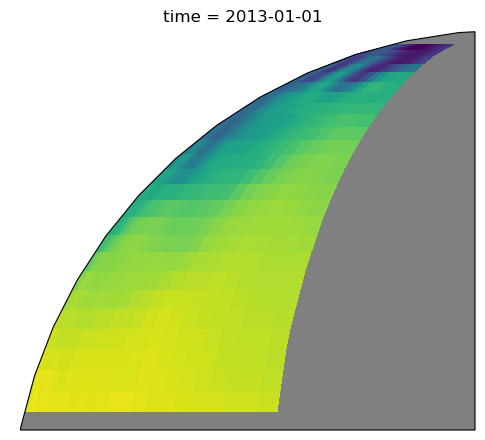

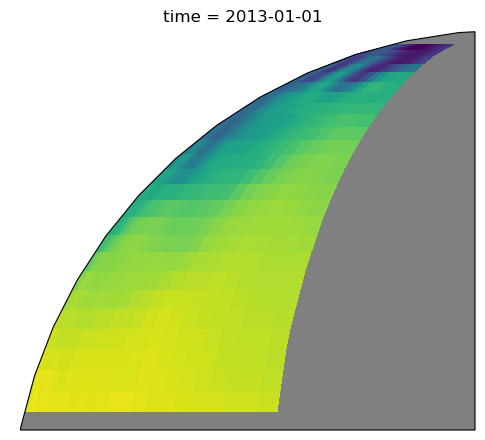

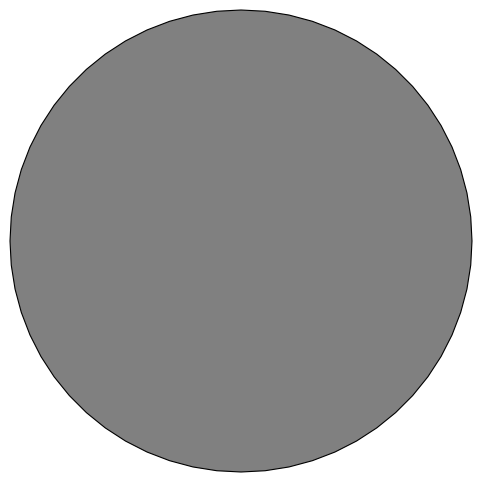

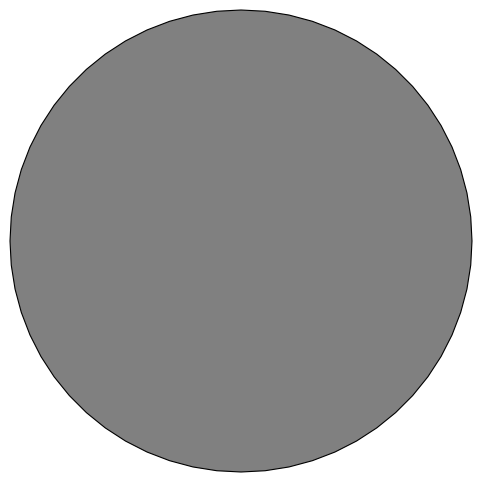

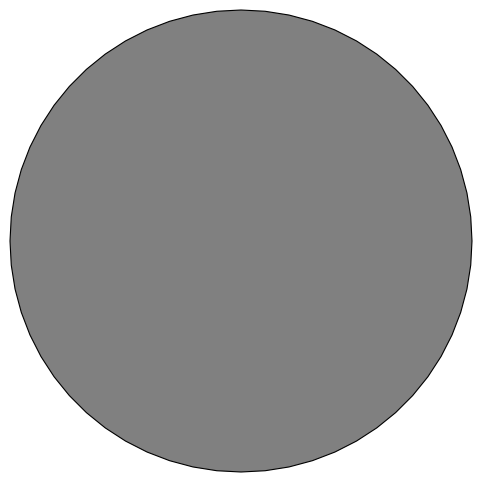

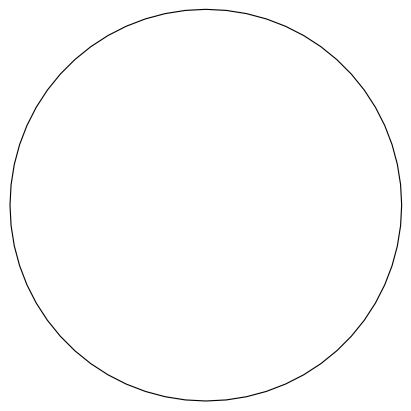

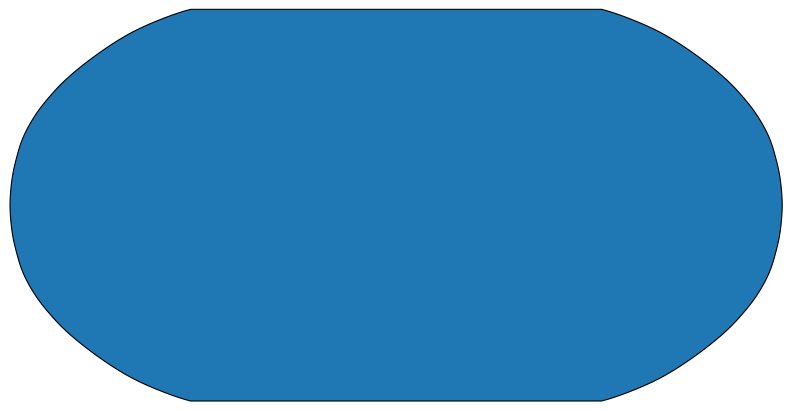

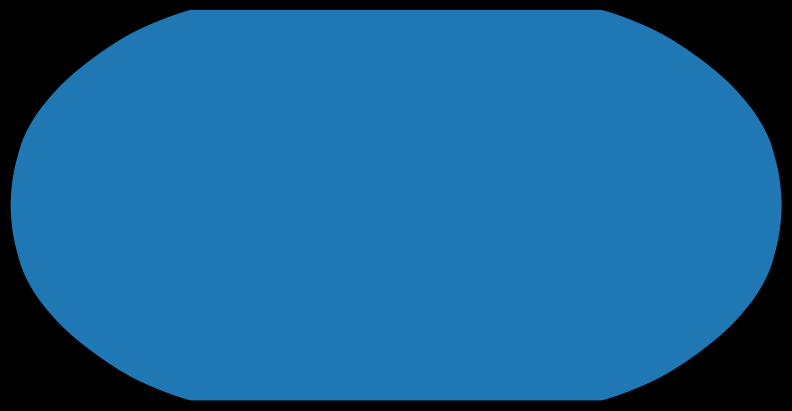

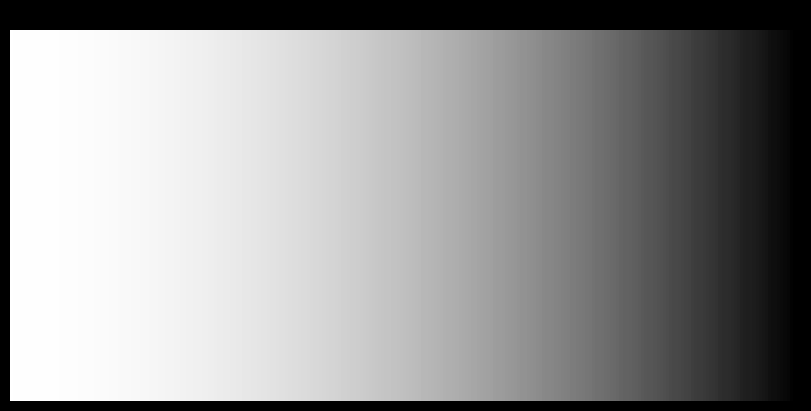

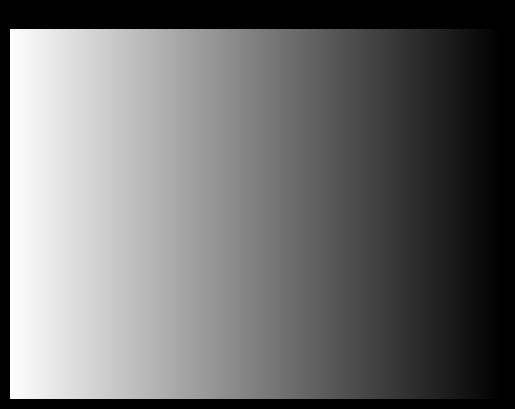

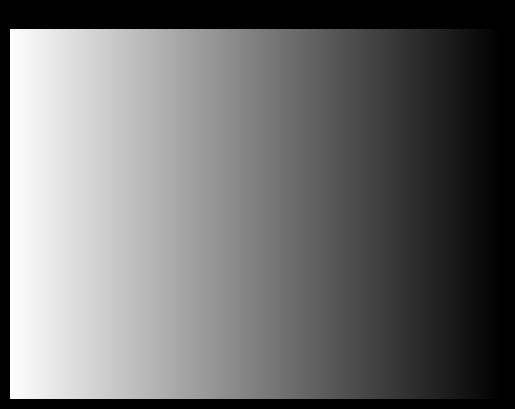

In [82]:
import numpy as np
import matplotlib.pyplot as plt


# Example: show it as an image
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure()
plt.imshow(gradient, aspect='auto', cmap=white_to_transparent)
plt.axis('off')
plt.title('White to Transparent')
plt.show()

In [90]:
worldmap(dsn['CAPE_max'].isel(time=0))

In [83]:
from matplotlib.colors import ListedColormap

# Create an array of RGBA values from white to transparent white
n_colors = 256
colors = np.ones((n_colors, 4))  # all white, RGBA
colors[:, 3] = np.linspace(1.0, 0.0, n_colors)  # alpha channel goes from 1 to 0

# Create and register the colormap
white_to_transparent = ListedColormap(colors, name='white_to_transparent')

In [88]:
from streamjoy import stream, wrap_matplotlib
from streamjoy import stream, connect
import xarray as xr
import numpy as np

# cartopy.crs.NearsidePerspective(central_longitude=0.0, central_latitude=0.0, satellite_height=35785831, false_easting=0, false_northing=0, globe=None)

@wrap_matplotlib()
def plot_func(da_time, ds_frame_other, central_lon, central_lat, height, **plot_kwargs):
    # projection = ccrs.Robinson(central_longitude=0)
    projection = ccrs.NearsidePerspective(
        central_lon,
        central_lat,
        height
    )
    fig, ax = plt.subplots(
        figsize=(8, 4), 
        subplot_kw={"projection": projection, "facecolor":"gray"}, 
        constrained_layout=True, 
        dpi=150, 
    )
    fig.set_facecolor('black')
    ax.set_global()
    hpshow = egh.healpix_show(ds_frame_other['w200'], ax=ax,**plot_kwargs)
    # egh.healpix_show(ds_frame_other['w200'], ax=ax, cmap=white_to_transparent)
    cbar = plt.colorbar(hpshow, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.8)
    return fig


st = stream(
    dsn, 
    dim='time', 
    var='time', # this natively only works with a dataarray ( I am only passing the time as a dummy here)
    renderer=plot_func, 
    renderer_iterables=[
        [dsn.isel(time=t) for t in range(ds.time.size)], # I am passing each timestep again as a daataset!!!
        np.linspace(80, 90, dsn.time.size),
        np.linspace(-50, 50, dsn.time.size),
        np.repeat(35785831, dsn.time.size)
    ], 
    
    max_frames=10,
)
st.write('healpix.mp4')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36589,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B
Comm: tcp://127.0.0.1:41459,Total threads: 4
Dashboard: http://127.0.0.1:41229/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:38135,


/home/jbusecke/.conda/envs/easy25/lib/python3.12/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 288.97 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/tmp/ipykernel_627340/1177704289.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 2 Axes> than <Figure size 1200x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1177704289.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 2 Axes> than <Figure size 1200x600 with 1 Axes> which fig.colorbar is called on.
/tmp/ipykernel_627340/1177704289.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 2 Axes> than <Figure size 1200x600 with 2 Axes> which f

PosixPath('healpix.mp4')